## Stockholm Hosuing Demand Analysis

This analysis aims to show how the average days required to sell a property in Stockholm is changing over the last 18 months.

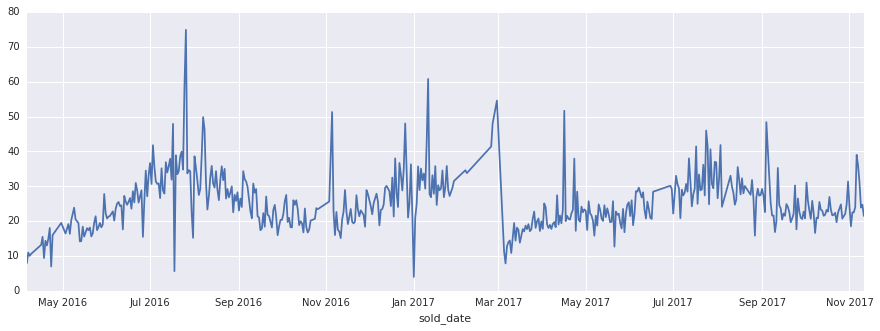

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime

# read the data.
data = pd.read_csv('sold_properties_stockholm_apr16_to_oct17_v3.csv', sep=',')

# Convert string type data collumns to date type.
data['publish_date'] = pd.Series([pd.to_datetime(publish_date).date() for publish_date in data['publish_date']])
data['sold_date'] = pd.Series([pd.to_datetime(sold_date).date() for sold_date in data['sold_date']])

# Get the avg days to sell by date
avg_days_by_date = data.groupby("sold_date").mean()

#plot
avg_days_by_date.days_to_sell.plot(kind="line", figsize=(15,5))